## 可视化第一课（matplotlib）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Visualization1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析
* 从seaborn库中载入flights数据并查看表头

In [30]:
data = sns.load_dataset("flights")
print(data.head())
# 年份，月份，乘客数
print(data.shape)

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
(144, 3)


* 分析年度乘客总量变化情况（折线图）

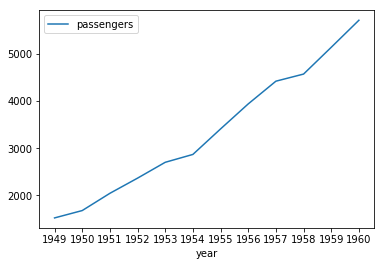

In [11]:
df_year = data.groupby(["year"]).sum()
df_year.plot(kind="line", xticks=df_year.index)
# df_year.plot(kind="scatter")

* 分析乘客在一年中各月份的分布（柱状图）

([<matplotlib.axis.XTick at 0x1c5bc630>,
 <a list of 12 Text xticklabel objects>)

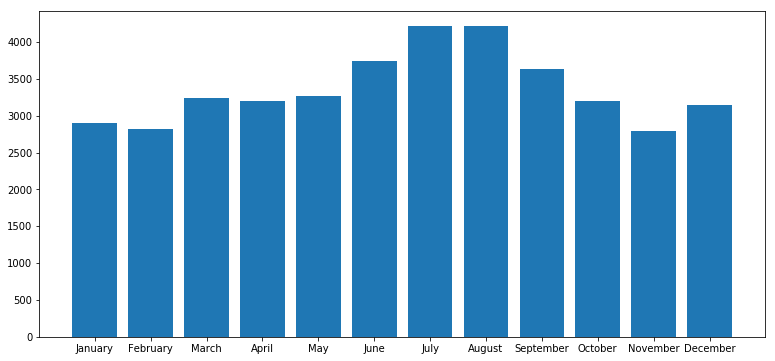

In [27]:
df_month = data.groupby(["month"]).sum().reset_index()
# names = df_month.index
# df_month = df_month.
plt.figure(figsize=(13, 6))
plt.bar(df_month.index, df_month.passengers)
plt.xticks(df_month.index, labels=df_month.month)


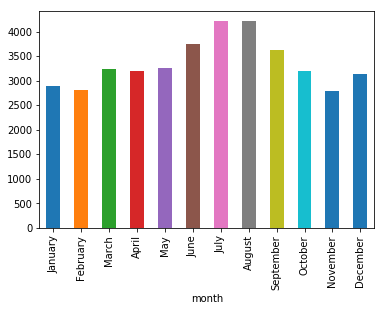

In [31]:
data.groupby('month')['passengers'].sum().plot(kind='bar')

## 练习2：鸢尾花花型尺寸分析

* 从seaborn库中载入flights数据并查看表头

In [46]:
data = sns.load_dataset("iris")
print(data.head())
print(data.shape)
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类
print(set(data.species))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
{'virginica', 'setosa', 'versicolor'}


* 萼片（sepal）和花瓣（petal）的大小关系（散点图）

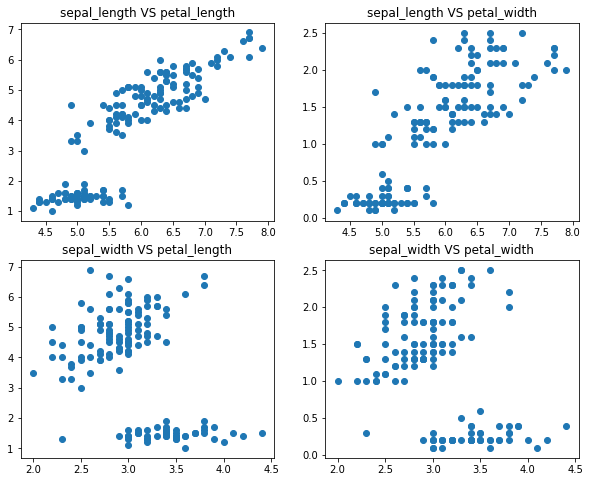

In [50]:
mpl.rc("figure", figsize=(10,8))



def sepal_petal(data, xlabel, ylabel, num):
    axes = plt.subplot(2,2,num)
    axes.scatter(data[xlabel], data[ylabel])
    axes.set_title(xlabel+" VS "+ylabel)

sepal_petal(data, 'sepal_length', 'petal_length',1)
sepal_petal(data, 'sepal_length', 'petal_width',2)
sepal_petal(data, 'sepal_width', 'petal_length',3)
sepal_petal(data, 'sepal_width', 'petal_width',4)



* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

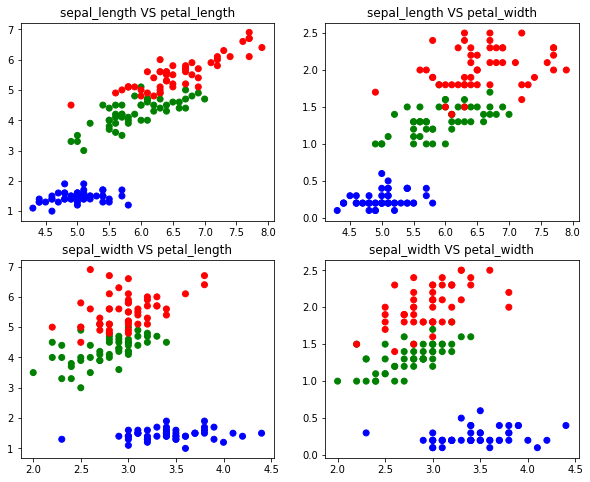

In [52]:
cmap = {'virginica':"red", 'setosa':"blue", 'versicolor':"green"}
cc = [cmap[x] for x in data["species"]]


def sepal_petal2(data, xlabel, ylabel, num):
    axes = plt.subplot(2,2,num)
    axes.scatter(data[xlabel], data[ylabel],c=cc)
    axes.set_title(xlabel+" VS "+ylabel)

sepal_petal2(data, 'sepal_length', 'petal_length',1)
sepal_petal2(data, 'sepal_length', 'petal_width',2)
sepal_petal2(data, 'sepal_width', 'petal_length',3)
sepal_petal2(data, 'sepal_width', 'petal_width',4)


* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

## 练习3：餐厅小费情况分析


In [4]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

## 练习4：泰坦尼克号海难幸存状况分析
* 载入数据集

In [5]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

* 不同性别的幸存比例（堆积柱状图）

* 幸存和遇难乘客的票价分布（分类箱式图）

* 幸存和遇难乘客的年龄分布（分类箱式图）

* 不同上船港口的乘客仓位等级分布（分组柱状图）

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）